# Detectron2 Custom Training Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to detectron2!

# Install detectron2

In [1]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-759v50nw/pyyaml_f043bc5c5f414f40870d4f79809ce0af/setup.py", line 291, in <module>
          setup(
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 185, in setup
          return run_commands(dist)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 201, in run_commands
          dist.run_commands()
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/dist.py", line 969, in run_commands
          self.run_command(cmd)
        File "/opt/conda

In [3]:
# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Install detectron2 (if not installed)
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

# Define cv2_imshow function using matplotlib
import matplotlib.pyplot as plt

def cv2_imshow(image):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Additional setup for detectron2
# Avoid using setup_logger() as it's not necessary in Kaggle environment


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html


In [5]:
pwd

'/kaggle/working'

In [5]:
%cd /content/drive/MyDrive/Classes/Detectron2_detection

/content/drive/MyDrive/Classes/Detectron2_detection


In [6]:
%cd /kaggle/input/card-images/data_detectron2

/kaggle/input/card-images/data_detectron2


# Register data

In [7]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("customtrain1", {}, "./output.json", "./train")

In [8]:
sample_metadata = MetadataCatalog.get("customtrain1")
dataset_dicts = DatasetCatalog.get("customtrain1")

WARNING [02/12 13:07:04 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/12 13:07:04 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json


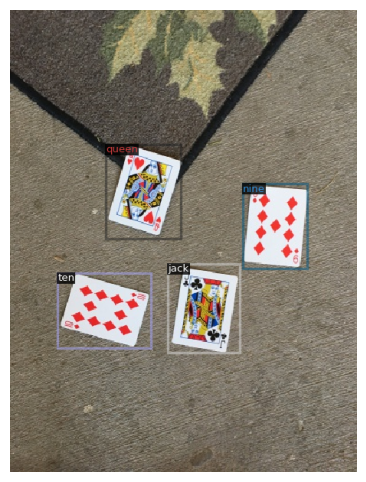

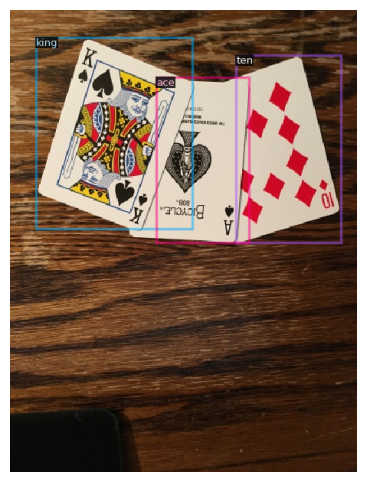

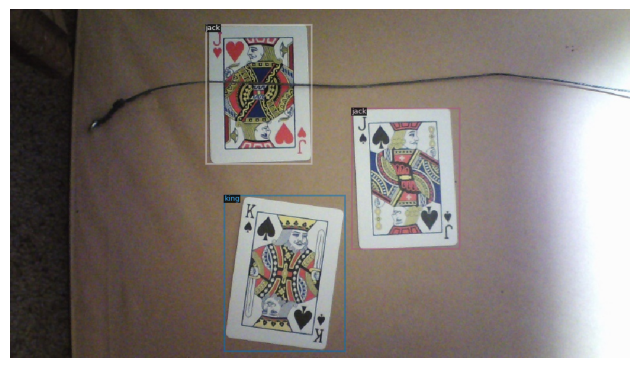

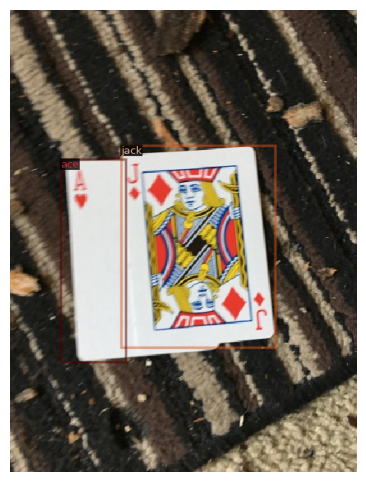

In [9]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=1.2)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Training

In [11]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("customtrain1",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg.SOLVER.MAX_ITER = 500    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

import os
# Change the output directory to /kaggle/working/
cfg.OUTPUT_DIR = '/kaggle/working/output/'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[02/12 13:11:57 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 230MB/s]                             


[02/12 13:11:58 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/12 13:12:09 d2.utils.events]:  eta: 0:02:58  iter: 19  total_loss: 2.426  loss_cls: 1.671  loss_box_reg: 0.6976  loss_rpn_cls: 0.005213  loss_rpn_loc: 0.004919    time: 0.3689  last_time: 0.3087  data_time: 0.0117  last_data_time: 0.0045   lr: 9.7405e-05  max_mem: 2277M


2024-02-12 13:12:11.558200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 13:12:11.558306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 13:12:11.719472: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[02/12 13:12:28 d2.utils.events]:  eta: 0:02:44  iter: 39  total_loss: 1.487  loss_cls: 0.7342  loss_box_reg: 0.7287  loss_rpn_cls: 0.001737  loss_rpn_loc: 0.004587    time: 0.3682  last_time: 0.4051  data_time: 0.0055  last_data_time: 0.0063   lr: 0.00019731  max_mem: 2544M
[02/12 13:12:36 d2.utils.events]:  eta: 0:02:40  iter: 59  total_loss: 1.308  loss_cls: 0.5288  loss_box_reg: 0.7363  loss_rpn_cls: 0.002486  loss_rpn_loc: 0.004592    time: 0.3733  last_time: 0.4072  data_time: 0.0057  last_data_time: 0.0053   lr: 0.0002972  max_mem: 2546M
[02/12 13:12:43 d2.utils.events]:  eta: 0:02:33  iter: 79  total_loss: 1.422  loss_cls: 0.5466  loss_box_reg: 0.8508  loss_rpn_cls: 0.0004518  loss_rpn_loc: 0.004224    time: 0.3746  last_time: 0.3691  data_time: 0.0051  last_data_time: 0.0059   lr: 0.00039711  max_mem: 2546M
[02/12 13:12:51 d2.utils.events]:  eta: 0:02:26  iter: 99  total_loss: 1.253  loss_cls: 0.4869  loss_box_reg: 0.7574  loss_rpn_cls: 0.001319  loss_rpn_loc: 0.002951    time

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("customtrain1", )
predictor = DefaultPredictor(cfg)

[02/12 13:18:07 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /kaggle/working/output/model_final.pth ...


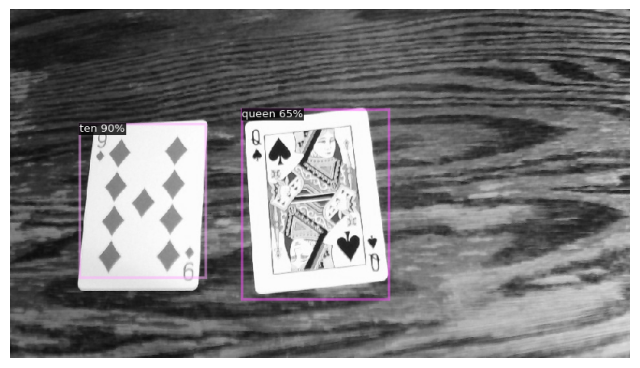

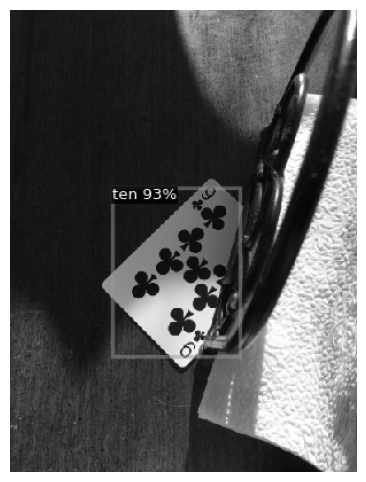

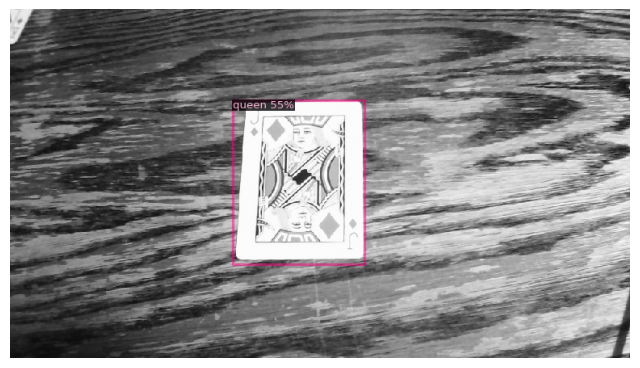

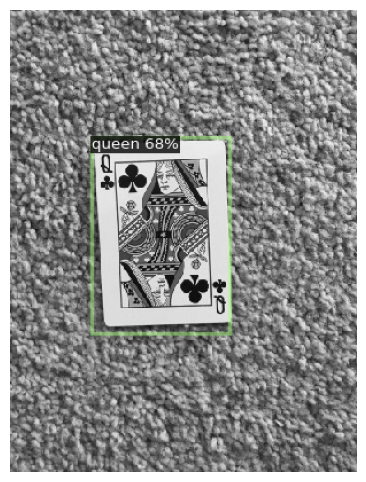

In [13]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [14]:
%cd data_detectron2

[Errno 2] No such file or directory: 'data_detectron2'
/kaggle/input/card-images/data_detectron2


# Evaluation

In [16]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("customtrain1", output_dir= "/kaggle/working/output")
val_loader = build_detection_test_loader(cfg, "customtrain1")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [02/12 13:22:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/12 13:22:11 d2.data.datasets.coco]: Loaded 290 images in COCO format from ./output.json
[02/12 13:22:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/12 13:22:11 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[02/12 13:22:11 d2.data.common]: Serializing 290 elements to byte tensors and concatenating them all ...
[02/12 13:22:11 d2.data.common]: Serialized dataset takes 0.07 MiB
[02/12 13:22:11 d2.evaluation.evaluator]: Start inference on 290 batches
[02/12 13:22:12 d2.evaluation.evaluator]: Inference done 11/290. Dataloading: 0.0013 s/iter. Inference: 0.1035 s/iter. Eval: 0.0002 s/iter. Total: 0.1050 s/iter. ETA=0:00:29
[02/12 13:22:17 d2.evaluation.evaluator]: Inference do

### Getting the custom config file

In [17]:
pwd

'/kaggle/input/card-images/data_detectron2'

In [19]:
import os

# Specify the file path in the writable directory
file_path = '/kaggle/working/config.yml'

# Write the YAML configuration to the file
with open(file_path, 'w') as f:
    f.write(cfg.dump())

# Print the file path for reference
print("Configuration file saved at:", file_path)

Configuration file saved at: /kaggle/working/config.yml
